In [1]:
import wave
import numpy

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%%bash
# Reconstructed (template -- no noise)
if [ ! -f fig2-unfiltered-template-reconstruction-H.txt ]; then
    wget https://losc.ligo.org/s/events/GW150914/P150914/fig2-unfiltered-template-reconstruction-H.txt
fi

# Denoised signal (Hanford site)
if [ ! -f fig1-observed-H.txt ]; then
    wget https://losc.ligo.org/s/events/GW150914/P150914/fig1-observed-H.txt
fi

# Denoised signal (Livingston site)
if [ ! -f fig1-observed-L.txt ]; then
    wget https://losc.ligo.org/s/events/GW150914/P150914/fig1-observed-L.txt
fi

In [3]:
# pure tone
freq = 261.6 # Hz (Middle C)
#freq = 1400 # Hz ISCO
duration = 5 * 4 # s (FIXME: times bytes?)
sampling_rate = 44100 # audio is typically encoded at 44.1 kHz
t = numpy.linspace(0, duration, sampling_rate * duration, dtype = numpy.float32)
data = numpy.cos(2 * numpy.pi * t * freq / 2) # FIXME: What's with the factor of two?

# Convert to 4 byte unsigned integer for encoding
data.dtype = numpy.uint32

wout = wave.open("pure_tone.wav", "w")
wout.setnchannels(2) # mono
wout.setsampwidth(4) # 32 bit audio
wout.setframerate(sampling_rate)
wout.writeframes(data)
wout.writeframes(data)
wout.close()

In [121]:
%%html
<iframe src="https://commons.wikimedia.org/wiki/File%3AAudio_Frequency_tone%2C_Middle_C%2C_C4%2C_261.63hz.ogg?embedplayer=yes" width="120" height="120" frameborder="0" ></iframe>

In [122]:
%%bash
# OS X only
file pure_tone.wav
time afplay pure_tone.wav

pure_tone.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 32 bit, stereo 44100 Hz



real	0m5.363s
user	0m0.048s
sys	0m0.027s


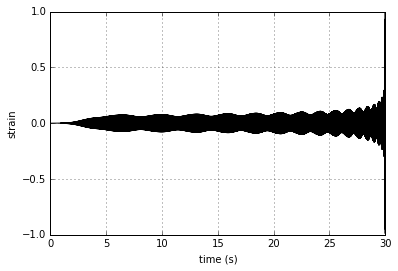

In [4]:
import lal, lalsimulation
sampling_rate = 16384 * 4

m1, m2 = 1.4 * lal.MSUN_SI, 1.4 * lal.MSUN_SI
s1x, s1y, s1z = 0.5, 0.5, 0.0
#s1x, s1y, s1z = 0.0, 0.0, 0.0
s2x, s2y, s2z = 0.9, 0.0, 0.0
approx = lalsimulation.GetApproximantFromString("IMRPhenomPv2")
hp, hx = lalsimulation.SimInspiralTD(0, 1.0/sampling_rate,
                                     m1, m2,
                                     s1x, s1y, s1z,
                                     s2x, s2y, s2z,
                                     40, 10,
                                     1e6*lal.PC_SI, 0.0,
                                     1.0, 0.0, 
                                     0.0, None, None, -1, 7, approx)

tmplt = hp.data.data  + hx.data.data

t = numpy.linspace(0, len(hp.data.data) / sampling_rate, len(hp.data.data), dtype = numpy.float32)
tmplt /= tmplt.max()
tmplt = tmplt.astype(numpy.float32)

plt.plot(t, tmplt, "k-")
plt.grid()
# Note that the time is actually relative to a given GPS time recorded by a instrument
plt.xlabel("time (s)")
plt.ylabel("strain")

tmplt.dtype = numpy.int32
tmplt = tmplt.copy(order='C')

wout = wave.open("NSBH_noise_free.wav", "w")
wout.setnchannels(1) # mono
wout.setsampwidth(4) # 32 bit audio
wout.setframerate(sampling_rate)
#wout.setnframes(1)
# Now... why do I have to write this four times?
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.close()

In [5]:
%%bash
# OS X only
file NSBH_noise_free.wav
time afplay NSBH_noise_free.wav

NSBH_noise_free.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 32 bit, mono 65536 Hz



real	0m31.376s
user	0m0.296s
sys	0m0.102s


In [6]:
# Import template data
t, _, tmplt = numpy.loadtxt("fig2-unfiltered-template-reconstruction-H.txt", unpack=True, dtype=numpy.float32)

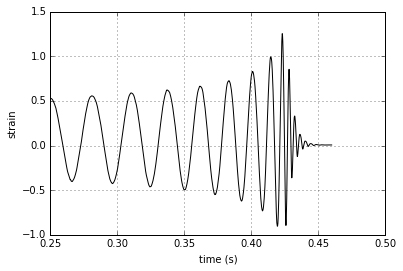

In [7]:
plt.plot(t, tmplt, "k-")
plt.grid()
# Note that the time is actually relative to a given GPS time recorded by a instrument
plt.xlabel("time (s)")
plt.ylabel("strain")

In [8]:
sampling_rate = 16384
tmplt.dtype = numpy.int32
tmplt = tmplt.copy(order='C')

wout = wave.open("GW150914_noise_free.wav", "w")
wout.setnchannels(1) # mono
wout.setsampwidth(4) # 32 bit audio
wout.setframerate(sampling_rate)
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.writeframes(tmplt)
wout.close()

In [9]:
%%bash
# OS X only
file GW150914_noise_free.wav
time afplay GW150914_noise_free.wav

GW150914_noise_free.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 32 bit, mono 16384 Hz



real	0m0.622s
user	0m0.027s
sys	0m0.017s
